In [1]:
import sys; print (sys.path)
import os
os.environ['LD_LIBRARY_PATH'] = ':'.join([os.environ.get('LD_LIBRARY_PATH', ''), '/opt/LCIO/lib'])
sys.path.append('/opt/LCIO/src/python')

['/home/jovyan/recophotons/notebooks', '/opt/root/lib', '/home/jovyan/recophotons/notebooks', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/home/jovyan/.local/lib/python3.10/site-packages', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages']


In [13]:
from pyLCIO import EVENT, UTIL, IOIMPL, IMPL
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import h5py 
import awkward as ak 
import argparse
import math
import importlib
from functions import CellIDDecoder
import functions as F


font = {'family' : 'serif',
        'size'   : 18}
mpl.rc('font', **font)
plt.style.use('classic')
mpl.rc('font', **font)

In [39]:
importlib.reload(F)
EOS_base ='/eos/user/e/eneren/photonAngleReco/Fixed_generated_showers/'
gname = 'geant4-5040_REC.slcio'
fname = 'bibae-5040_REC.slcio'


## SIM hits
r10, r20 = F.fracEsum(EOS_base+gname, 1900, 'EcalBarrelCollection')
f10, f20 = F.fracEsum(EOS_base+fname, 1900, 'EcalBarrelCollection')

## REC hits
#EcalBarrelCollectionRec
rRecSum = F.Esumhit(EOS_base+gname, 1900, 'EcalBarrelCollectionRec')
fRecSum = F.Esumhit(EOS_base+fname, 1900, 'EcalBarrelCollectionRec')




In [40]:
### PFO 
pfoE_real, nPFOr = F.pfo_energy(EOS_base+gname, 1900, 'PandoraPFOs', npfoCut=1)
pfoE_fake, nPFOf = F.pfo_energy(EOS_base+fname, 1900, 'PandoraPFOs', npfoCut=1)

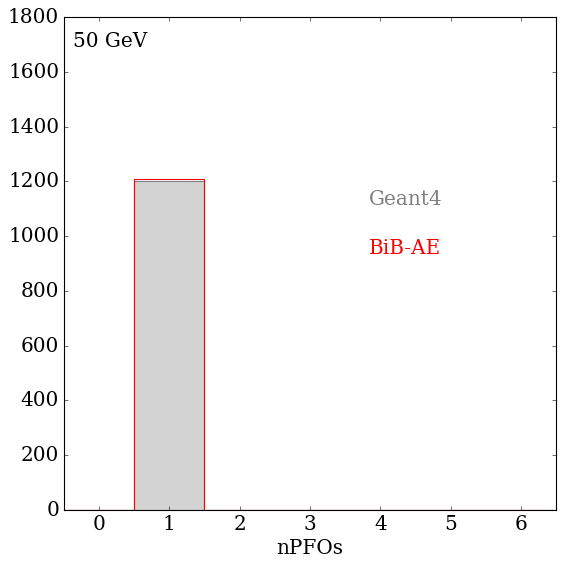

In [52]:
importlib.reload(F)
F.plt_NPFOs(nPFOr, nPFOf, 50, 6.5, -0.5, 7, 'nPFOs','npfo=1_')

REAL:  1.2110122617441332  +  0.03220645005555374
FAKE:  1.210740043577973  +  0.033698304643800636
REAL:  48.952098150722854  +  1.2939395837426522
FAKE:  48.98679124763166  +  1.3232714832453696
REAL:  49.10240476249904  +  1.2736468700561612
FAKE:  48.93240521400663  +  1.3074025339186544


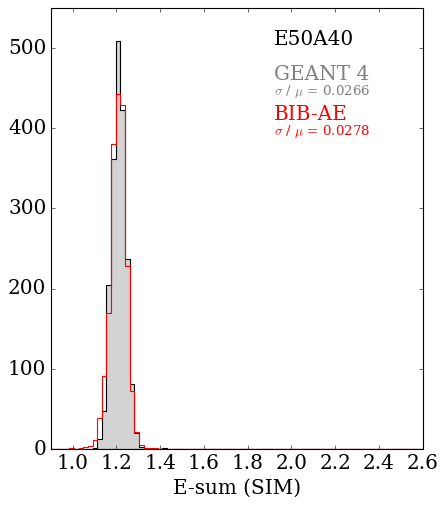

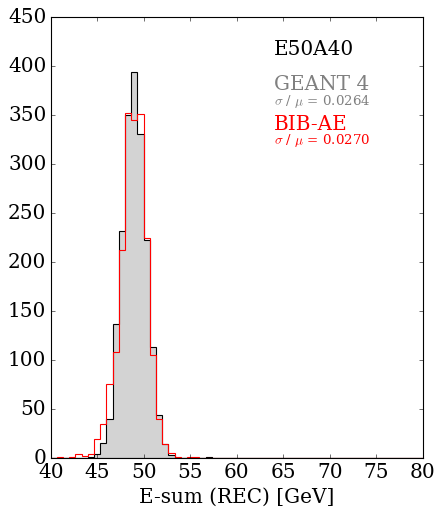

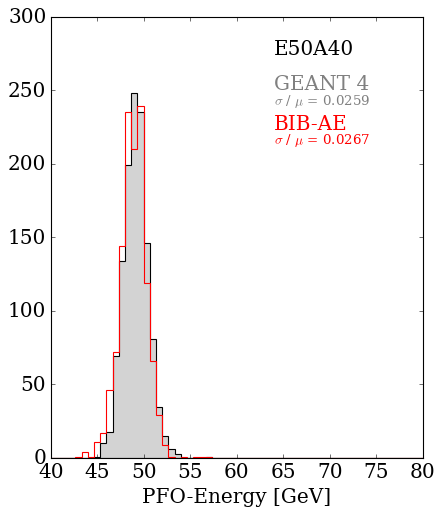

In [51]:
importlib.reload(F)

rEsum = np.add(r10,r20)
fEsum = np.add(f10,f20)
typ = 'E50A40'

F.plot_esum(rEsum, fEsum, 80, 0.9, 2.6, 550, 'esum_SIM_'+str(typ), 'E-sum (SIM)', typ, fit_stat=True,  p0 = [150., 1.0, 0.3])
F.plot_esum(rRecSum, fRecSum, 60, 40, 80, 450, 'esum_REC_'+str(typ), 'E-sum (REC) [GeV]', typ, fit_stat=True,  p0 = [250., 50, 3])
F.plot_esum(pfoE_real, pfoE_fake, 60, 40, 80, 300, 'esumPFO_nPFO=1_'+str(typ), 'PFO-Energy [GeV]', typ, fit_stat=True,  p0 = [250., 50, 3])

In [ ]:
inpLCIO = '/eos/user/e/eneren/photonAngleReco/lcio/photon-sim-E10010A9030-merged-93.slcio'
collection = 'EcalBarrelCollection'
nevents = 50
record = fill_record(inpLCIO, collection, nevents)


In [ ]:
test_map = fill_map(record)

In [ ]:
import pickle
f = open("dumpy.pkl","wb")
# write the python object (dict) to pickle file
pickle.dump(test_map,f)
f.close()
#test_map

In [ ]:
fr = open('dumpy.pkl', 'rb')
cmap = pickle.load(fr)  

In [ ]:
cmap[20,11,22]